# Lab 5: Gradient Descent
- **Author:** Suraj R. Nair ([suraj.nair@berkeley.edu](mailto:suraj.nair@berkeley.edu)) (Based on previous material by Emily Aiken)
- **Date:** February 19, 2025
- **Course:** INFO 251: Applied machine learning

### Topics:

1. Minimization: Gradient descent (live coding)
2. Exercises / Experiments (Your turn!)

### Learning Objectives:
At the end of this lab, you will understand:
- How to derive and code up partial derivatives for gradient descent
- When gradient descent converges to local and global minima
- How the number of iterations, stopping conditions, the learning rate, and random seeds impact the convergence of gradient descent


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib notebook

### 0. Define a function

Let's use a function with two inputs, $f(x,y)=(3x + 4)^2+ (y - 3)^2 + 10$.

In [3]:
# Define the function
def f(x, y):
    return (3*x + 4)**2 + (y-3)**2 + 10

### 1. Visualize the Function

<IPython.core.display.Javascript object>


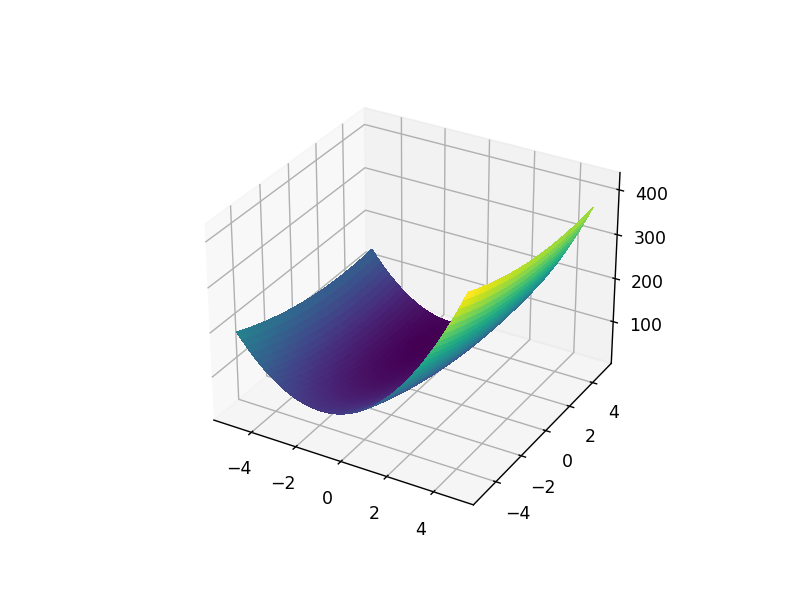

In [4]:
# Visualize the function
a = np.arange(-5, 5, 0.05)
b = np.arange(-5, 5, 0.05)

X, Y = np.meshgrid(a, b)
Z = f(X, Y)

sns.reset_orig()
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0, antialiased=False)
plt.show()

### 2. Derive the minimum 


**Question:** Calculate the *gradient* for the function: $\nabla f(x, y) = (\frac{\partial f(x,y)}{\partial x}, \frac{\partial f(x, y)}{\partial y})$.

**Question:** What is the minimum of this function?

**Answer**:

$\frac{\partial f(x,y)}{\partial x} =  18x + 24$

$\frac{\partial f(x, y)}{\partial y} = 2y - 6$

The minimum of this function lies at (-1.33, 3). At these coordinates, f(x, y) = 10

### 3. Finding the minimum using gradient descent

Let's write a simple function to find the minimum of this function using gradient descent! In order to do this:
- define functions to calculate the partial derivatives
- fill out the gradient_descent function (scaffolding provided)
- test your function using the following inputs:
    - px = 5
    - py = 0
    - learning_rate = 0.001
    - max_iter = 5000
- visualize the function, and the optimization path (code provided below)

In [23]:
def gradient_descent(px, py, learning_rate, dx,dy,  max_iter = 1000):
    """
    Inputs
    -----------
    px: x coordinate of the starting point
    py: y coordinate of the starting point
    learning_rate: R, controls the size of the update / step
    max_iter: maximum number of iterations
    dx: function to calculate the gradient wrt x
    dy: function to calculate the gradient wrt y
    
    Outputs
    xpath: x coordinates that are visited  
    ypath: y coordinates that are visited
    zpath: z coordinates that are visited
    """
    xpath = [px]
    ypath = [py]
    zpath = [f(px, py)]
    
    for i in range(max_iter):
        gradient_x = dx(px)
        gradient_y = dy(py)
        
        px = px - learning_rate * gradient_x
        py = py - learning_rate * gradient_y
        
        xpath.append(px)
        ypath.append(py)
        zpath.append(f(px, py))
    
    return xpath, ypath, zpath

In [88]:
### Complete:
dx = lambda x: 6 * x + 8
dy = lambda y: 2 * y - 6

xpath, ypath, zpath = gradient_descent(5, 0, 0.001, dx, dy, max_iter = 5000)

<IPython.core.display.Javascript object>


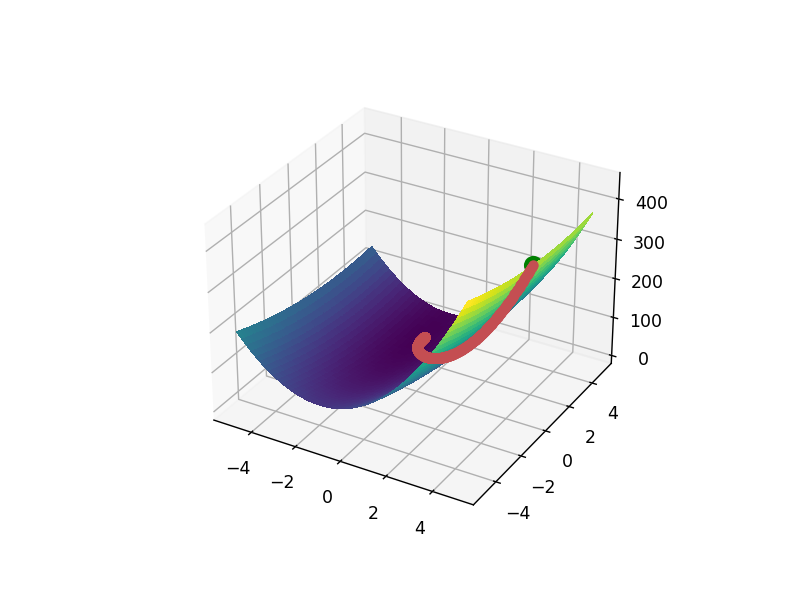

In [89]:
# Visualize the function, and the optimization path
a = np.arange(-5, 5, 0.01)
b = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(a, b)
Z = f(X, Y)

sns.reset_orig()
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0, antialiased=False)
ax.plot(xpath, ypath, zpath, 'r.-', linewidth=2, markersize=10, label='Optimization Path', zorder = 10)

# Mark start and end points
ax.scatter(xpath[0], ypath[0], zpath[0], color='green', s=100, label='Start', zorder = 20)
ax.scatter(xpath[-1], ypath[-1], zpath[-1], color='red', s=100, label='End', zorder = 10)
# plt.legend()
plt.show()

### Your Turn!!!

**0. Number of iterations:** Plot the parameters (in this case, x and y) as a function of the number of iterations / epochs. What do you observe?

<IPython.core.display.Javascript object>


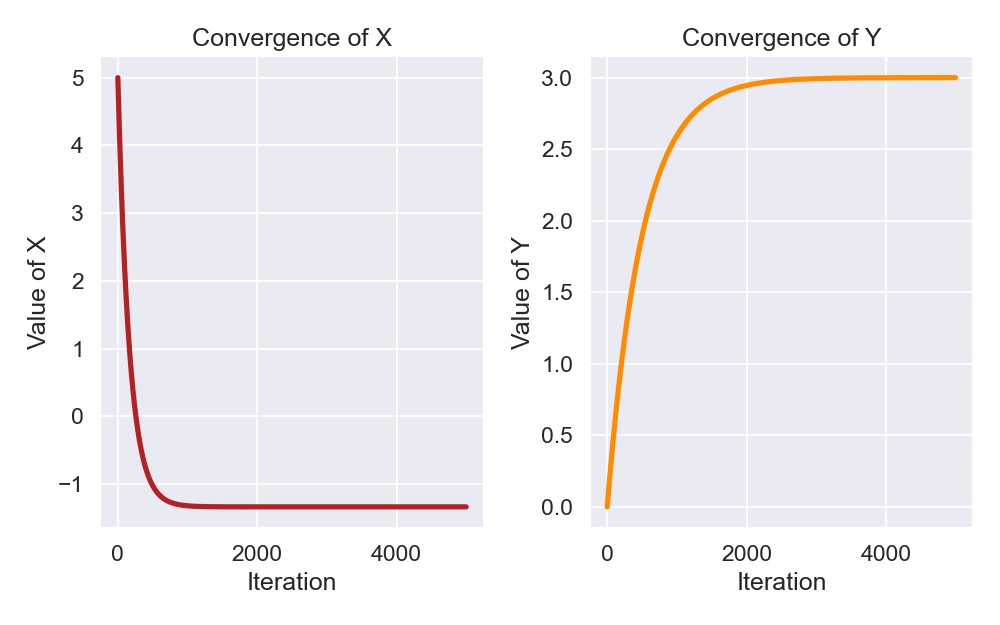

In [56]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

ax[0].plot(range(len(xpath)), xpath, color='firebrick', linewidth=3)
ax[0].set_title('Convergence of X')
ax[0].set_ylabel('Value of X')

ax[1].plot(range(len(ypath)), ypath, color='darkorange', linewidth=3)
ax[1].set_title('Convergence of Y')
ax[1].set_ylabel('Value of Y')

for a in range(len(ax)):
    ax[a].set_xlabel('Iteration')
    
plt.tight_layout()
plt.show()

**1. Stopping Condition:** Add a stopping condition: modify the *gradient_descent* function.  Instead of max_iter, implement a *stopping condition*, where we'll stop running gradient descent if *k* iterations in a row all have approximately the same value. 
- think carefully about how you would implement this stopping condition
- complete the *gradient_descent_w_stopping*
- test your function using the following inputs:
    - px = 5
    - py = 0
    - learning_rate = 0.001
    - compare how long it takes for convergence using stopping tolerance = [0.01, 0.001, 0.0001, ......]



In [43]:
def gradient_descent_w_stopping(px, py, learning_rate, dx, dy, stopping_tolerance):
    """
    Inputs
    -----------
    px: x coordinate of the starting point
    py: y coordinate of the starting point
    learning_rate: R, controls the size of the update / step
    dx: function to calculate the gradient wrt x
    dy: function to calculate the gradient wrt y
    stopping_tolerance: tolerance
    
    Outputs
    xpath: x coordinates that are visited  
    ypath: y coordinates that are visited
    zpath: z coordinates that are visited"""
    
    # Define lists to keep track of each function value visited
    xpath, ypath, zpath = [np.inf, px], [np.inf, py], [np.inf, f(px, py)]
    num_iter = 0
    while np.abs(xpath[-2] - xpath[-1]) > stopping_tolerance:
        
        # Calculate the derivative at the point
        gradient_x = dx(px)
        gradient_y = dy(py)
        
        # Move along the cost surface according to the derivative
        px = px - learning_rate * gradient_x
        py = py - learning_rate * gradient_y
        
        # Record the new values of the inputs (x and y) and the output (z, the function value)
        xpath.append(px)
        ypath.append(py)
        zpath.append(f(px, py))
        num_iter +=1
    
    return xpath, ypath, zpath, num_iter

In [48]:
for tolerance in [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]:
    x_path, y_path, z_path, num_iter = gradient_descent_w_stopping(5, 0, 0.001, dx, dy, tolerance)
    print('Minimum value of f: %.5f' % z_path[-1], "Number of Iterations:", num_iter)
    print('Arguments at minimum value of f: (%.5f, %.5f)' % (x_path[-1], y_path[-1]))


Minimum value of f: 38.33623 Number of Iterations: 223
Arguments at minimum value of f: (0.32166, 1.08031)
Minimum value of f: 11.04053 Number of Iterations: 606
Arguments at minimum value of f: (-1.16822, 2.10828)
Minimum value of f: 10.17402 Number of Iterations: 989
Arguments at minimum value of f: (-1.31686, 2.58578)
Minimum value of f: 10.03719 Number of Iterations: 1371
Arguments at minimum value of f: (-1.33168, 2.80721)
Minimum value of f: 10.00802 Number of Iterations: 1754
Arguments at minimum value of f: (-1.33317, 2.91044)


**2. Learning Rates:** Investigate the impact of different learning rates on the convergence of this gradient descent algorithm. 
- Fix a starting point (i.e for x and y): sticking to (5, 0) is fine, but feel free to chose your own.  
- For each learning rate, run your gradient descent function for 1000 iterations. Iterate over the following set of learning rates: [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001, 0.000000001]
- Create a plot, where learning rates are on the x-axis, and the estimated values of *x* are on the y-axis. What do you observe?
- In similar fashion, create a second plot, this time using the estimated values of *y*. 

<IPython.core.display.Javascript object>


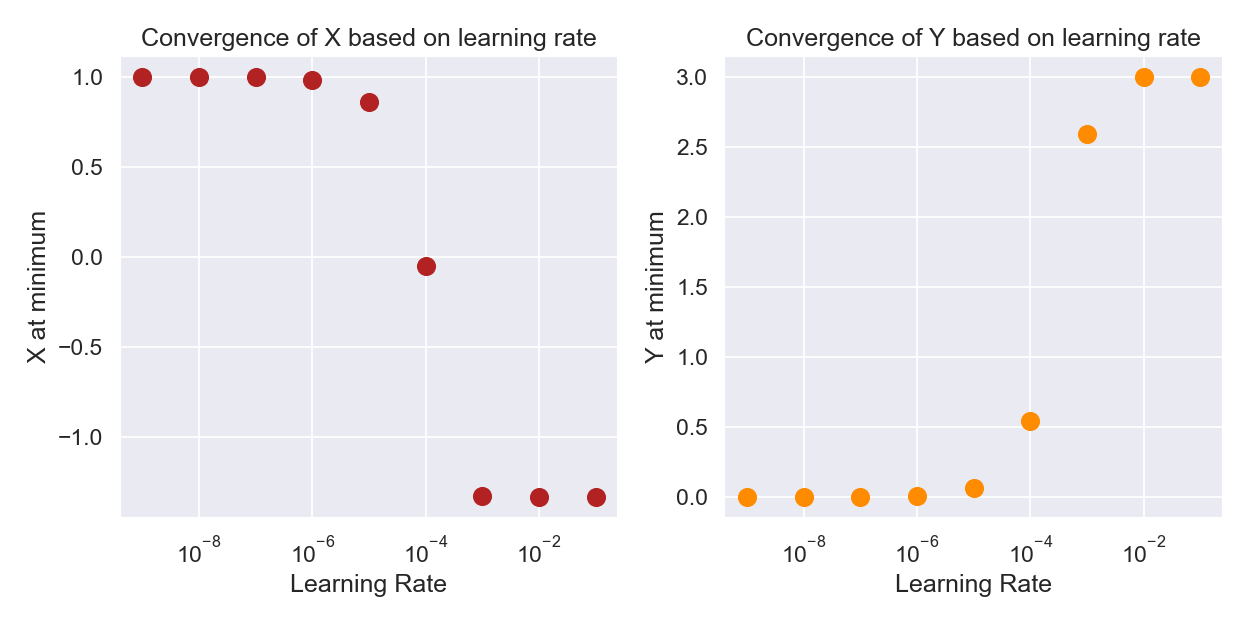

In [55]:
# How does the learning rate impact the convergence of gradient descent?
min_xs, min_ys, min_zs = [], [], []
learning_rate_grid = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001, 0.000000001]
for learning_rate in learning_rate_grid:
    x_path, y_path, z_path = gradient_descent(1, 0, learning_rate, dx, dy, 1000)
    min_xs.append(x_path[-1])
    min_ys.append(y_path[-1])
    min_zs.append(z_path[-1])
    
sns.set(font_scale=1.2)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(learning_rate_grid, min_xs, s=100, color='firebrick')
ax[0].set_title('Convergence of X based on learning rate')
ax[0].set_ylabel('X at minimum')

ax[1].scatter(learning_rate_grid, min_ys, s=100, color='darkorange')
ax[1].set_title('Convergence of Y based on learning rate')
ax[1].set_ylabel('Y at minimum')

for a in range(len(ax)):
    ax[a].set_xscale('log')
    ax[a].set_xlabel('Learning Rate')
    
plt.tight_layout()
plt.show()

**3.Random Initialization:** Confirm that your algorithm converges irrespective of the starting point. 

In order to do this:
- Create 250 random initializations for x and y.
- For each random initialization, run gradient descent, and store the outputs. (This might take a few seconds on your computer, so start by setting *max_iter* = 1000). 
    - Note: If you are using the gradient descent function we defined earlier, you only need to store the final values in xpath / ypath for this exercise. 
- Plot the distribution of the obtained x and y values. Add vertical lines indicating the *mean* of these values. 


What do you observe?

<IPython.core.display.Javascript object>


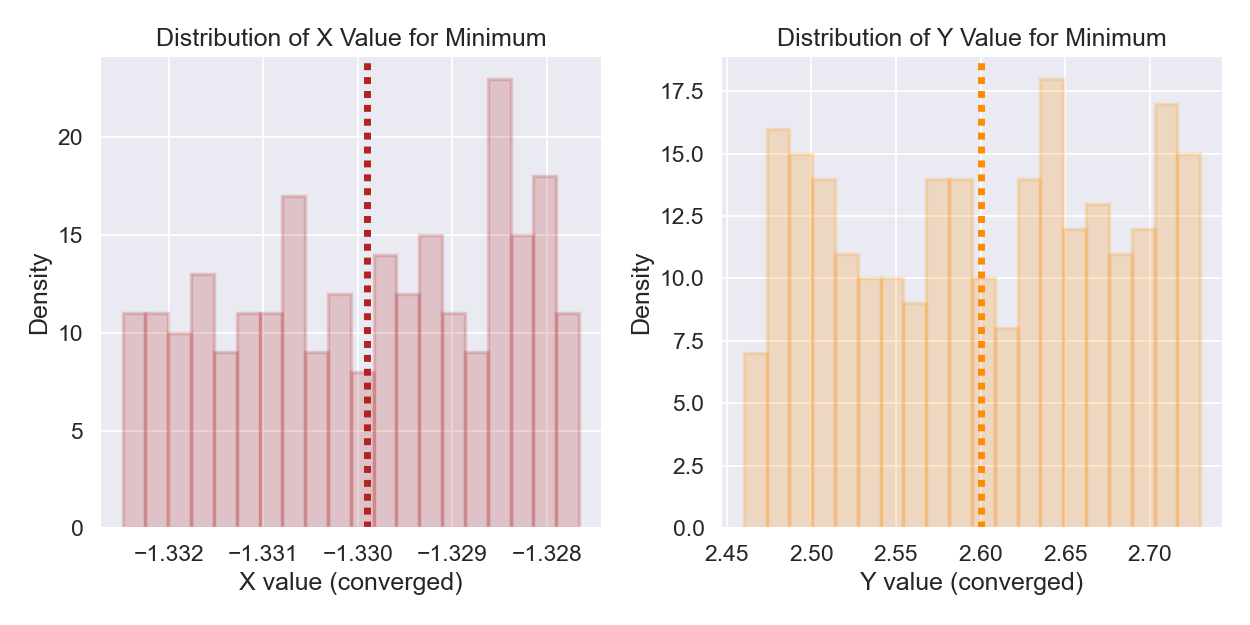

In [59]:
# Experiment with random initializations for gradient descent
x_mins, y_mins, z_mins = [], [], []
for i in range(250):
    x_path, y_path, z_path = gradient_descent(np.random.rand()*2 - 1, np.random.rand()*2 - 1, 0.001, dx, dy, 1000)
    x_mins.append(x_path[-1])
    y_mins.append(y_path[-1])
    z_mins.append(z_path[-1])
    
sns.set(font_scale=1.2)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].hist(x_mins, color='firebrick', alpha=0.2, bins=20, edgecolor='firebrick', linewidth=2)
ax[0].axvline(np.mean(x_mins), dashes=[1, 1], color='firebrick', linewidth=4)
ax[0].set_title('Distribution of X Value for Minimum')
ax[0].set_xlabel('X value (converged)')

ax[1].hist(y_mins, color='darkorange', alpha=0.2, bins=20, edgecolor='darkorange', linewidth=2)
ax[1].axvline(np.mean(y_mins), dashes=[1, 1], color='darkorange', linewidth=4)
ax[1].set_title('Distribution of Y Value for Minimum')
ax[1].set_xlabel('Y value (converged)')


for a in range(len(ax)):
    ax[a].set_ylabel('Density')

plt.tight_layout()
plt.show()